In [21]:
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.cm as cm

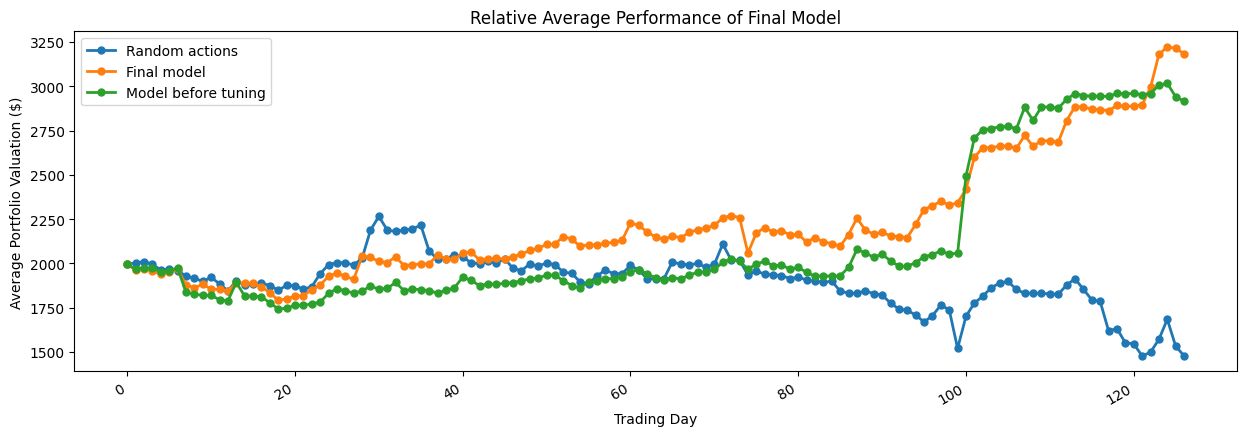

In [26]:
def plot_model_perf(fname, labels):
    
    data = pd.read_csv(fname, header = None)
    data.columns = [f"{day}" for day in range(data.shape[1])]
    
    plt.figure(figsize=(15, 5))
    
    cmap = cm.tab10
    
    for idx, row in data.iterrows():
        plt.plot(row, linewidth = 2, marker = "o", markersize = 5, label = labels[idx], color = cmap(idx % 10))
        
    plt.title("Relative Average Performance of Final Model")
    
    x_ticks = list(range(0, len(data.columns), 20))
    
    plt.xticks(x_ticks, [data.columns[tick] for tick in x_ticks])
    
    plt.gcf().autofmt_xdate()
    
    plt.xlabel("Trading Day")
    plt.ylabel("Average Portfolio Valuation ($)")
    
    plt.legend()
    
    plt.savefig("model_perf_128_all.png", bbox_inches = "tight")
    plt.show()
    
#labels = ["PPO Rew7", "TRPO Rew7", "PPO Rew6", "TRPO Rew6", "Base"]
#labels = ["Random actions", "Julian Obs1 Rew3 PPO", "Julian Obs1 Rew3 TRPO", "Julian Obs2 Rew1 PPO", "Julian Obs2 Rew1 TRPO", "Ryan Rew1 PPO", "Ryan Rew1 TRPO", "Ryan Rew2 PPO", "Ryan Rew2 TRPO"]
labels = ["Random actions","Final model", "Model before tuning"]# "Batch size = 128", "Batch size = 256", "Batch size = 64"]
    
plot_model_perf("output/model_performances.csv", labels)